In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import Normalizer
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv(r"winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
n=df.shape[0]
quality_bin=np.zeros(n)
for i in range(n):
    if df.at[i,'quality']>=7:
        quality_bin[i]=1
    else:
        quality_bin[i]=0
quality_bin=pd.DataFrame(quality_bin)
df = pd.concat([df, quality_bin], axis=1)  
df = df.rename(columns={df.columns[12]: 'binary quality'})
df.drop('quality', axis=1, inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,binary quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0


In [4]:
df.dropna(inplace=True)
df.drop_duplicates(inplace = True)
print(df.duplicated())
print(df.info())

0       False
1       False
2       False
3       False
5       False
        ...  
1593    False
1594    False
1595    False
1597    False
1598    False
Length: 1359, dtype: bool
<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  binary quality        1359 non-null   float64
dtyp

In [5]:
for i in range(1):
    Q1=df.iloc[:,i].quantile(0.25)
    Q3=df.iloc[:,i].quantile(0.75)
    IQR=Q3-Q1
    low_limit=Q1-1.5*IQR
    upp_limit=Q3+1.5*IQR
    df=df[(df.iloc[:,i]>low_limit) & (df.iloc[:,i]<upp_limit)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1318 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1318 non-null   float64
 1   volatile acidity      1318 non-null   float64
 2   citric acid           1318 non-null   float64
 3   residual sugar        1318 non-null   float64
 4   chlorides             1318 non-null   float64
 5   free sulfur dioxide   1318 non-null   float64
 6   total sulfur dioxide  1318 non-null   float64
 7   density               1318 non-null   float64
 8   pH                    1318 non-null   float64
 9   sulphates             1318 non-null   float64
 10  alcohol               1318 non-null   float64
 11  binary quality        1318 non-null   float64
dtypes: float64(12)
memory usage: 133.9 KB


In [6]:
columns=['fixed acidity', 'volatile acidity', 'citric acid',  'residual sugar' ,'chlorides','free sulfur dioxide' ,  'total sulfur dioxide' ,  'density'  , 'pH' , 'sulphates' ,'alcohol']
Y=df['binary quality'].astype(int)
X=df[columns]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,stratify=Y,random_state=42)
scaler = Normalizer()
scaled_data = scaler.fit_transform(X)
X= pd.DataFrame(scaled_data,
                         columns=X.columns)
print(X.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.195153          0.018460     0.000000        0.050107   0.002004   
1       0.107241          0.012099     0.000000        0.035747   0.001347   
2       0.135457          0.013198     0.000695        0.039942   0.001598   
3       0.174367          0.004359     0.008718        0.029580   0.001168   
4       0.168468          0.015026     0.000000        0.040979   0.001707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.290092              0.896647  0.026314  0.092566   0.014768   
1             0.343722              0.921175  0.013705  0.043996   0.009349   
2             0.260494              0.937777  0.017314  0.056614   0.011288   
3             0.264664              0.934108  0.015537  0.049196   0.009030   
4             0.295957              0.910637  0.022716  0.079908   0.012749   

    alcohol  
0  0.247896  
1  0.134739  
2  0.170189  


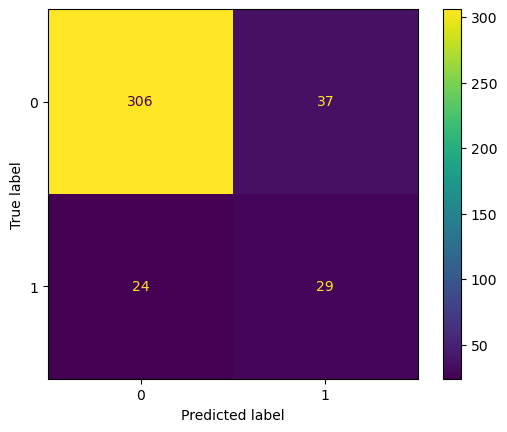

In [7]:
clf = DecisionTreeClassifier(max_depth =10, random_state = 42)
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
acc = accuracy_score(y_test, y_pred)

In [8]:
f1_dt=f1_score(y_test, y_pred)

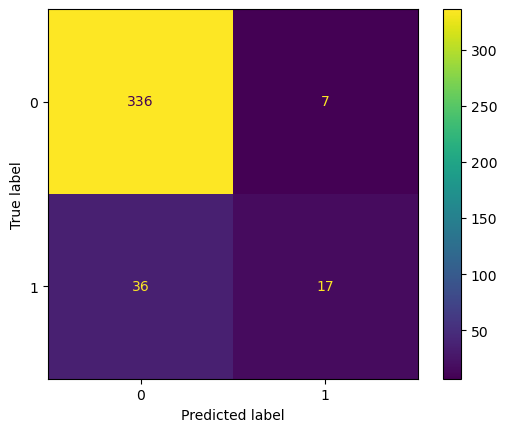

In [11]:
rf_model = RandomForestClassifier(random_state = 2020)
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.show()
acc_rf = accuracy_score(y_test,y_pred_rf)

In [10]:
f1_random=f1_score(y_test, y_pred_rf)
print(f'the f1 score for random forest and decision tree are {f1_random} and {f1_dt}')
print(f'the accuracy for random forest and decision tree are {acc_rf} and {acc}')

the f1 score for random forest and decision tree are 0.44155844155844154 and 0.4873949579831933
the accuracy for random forest and decision tree are 0.8914141414141414 and 0.8459595959595959
